### **Testing the impact of negations on CCS results**. LLM (Llamma, gemma)

Что я хочу сделать?

1. Как я обрабатываю датасеты под визуализацию, после получения raw результатов?
    - собрать pipeline
    - сделать все графики на ОДНОМ датасете или для гемм выпилить ещё отдельный
2. Графики. Что показывают? Проанализировать, собрать, подумать, как это засунуть в статью. 

In [1]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

sys.path.append(os.path.abspath(os.path.dirname('/Users/sabrinasadieh/Code/ccs_aisf/code/ccs.py')))

In [2]:
from format_results import get_results_table

GENERAL_PATH = '/Users/sabrinasadieh/Code/ccs_aisf/notebooks/rnd_check/'

def format_pivot_table_string(df):
    """
    Принимает DataFrame с колонками: 'perc_cluster', 'accuracy', 'agreement_score ↓', 'contradiction idx ↓'
    Возвращает строку вида:
    0.600, 0.00, 0.32 | 0.576, 0.00, 0.34 | ...
    """
    # Строим сводную таблицу
    table = round(df.pivot_table(index='perc_cluster',
                                  values=['polar_consistency_↓', 'contradiction_idx_↓'],
                                  aggfunc='min'), 2)

    # Добавляем колонку с accuracy (в виде списков)
    accuracy_col = df.pivot_table(index='perc_cluster',
                                   values='accuracy',
                                   aggfunc='max').values.tolist()
    table.insert(0, 'accuracy', accuracy_col)

    # Форматируем строки
    formatted_rows = table.apply(
        lambda row: f"{row['accuracy'][0]:.3f}, {row['polar_consistency_↓']:.2f}, {row['contradiction_idx_↓']:.2f}",
        axis=1
    )

    # Объединяем в строку
    return ' | '.join(formatted_rows)

def get_relative_clusters(table, x):
    table_len = len(table)

    first_idx = list(range(0, int(table_len*0.25)))
    second_idx = list(range(int(table_len*0.25), int(table_len*0.5)))
    third_idx = list(range(int(table_len*0.5), int(table_len*0.75)))
    fourth_idx = list(range(int(table_len*0.75),  int(table_len)+1))

    if x in first_idx:
        return 1
    if x in second_idx:
        return 2
    if x in third_idx:
        return 3
    if x in fourth_idx:
        return 4
    
def get_accuracy_clusters(x):
    if x < 0.625:
        return 1
    if (x >= 0.62) & (x < 0.75):
        return 2
    if (x >= 0.75) & (x < 0.875):
        return 3
    if x >= 0.875:
        return 4

### **Gemma models. Gemma2**

In [3]:
with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-2b_mixed_data_results.pkl', 'rb') as f:
  gemma2b_orig = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-2b_not_data_results.pkl', 'rb') as f:
    gemma2b_not = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-2b_ttt_data_results.pkl', 'rb') as f:
   gemma2b_ttt = pickle.load(f)

gemma2b_ttt_table = get_results_table(gemma2b_ttt)
gemma2b_not_table = get_results_table(gemma2b_not)
gemma2b_orig_table = get_results_table(gemma2b_orig)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-2b-it_mixed_data_results.pkl', 'rb') as f:
  gemma2b_it_orig = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-2b-it_not_data_results.pkl', 'rb') as f:
    gemma2b_it_not = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-2b-it_ttt_data_results.pkl', 'rb') as f:
   gemma2b_it_ttt = pickle.load(f)

gemma2b_it_ttt_table = get_results_table(gemma2b_it_ttt)
gemma2b_it_not_table = get_results_table(gemma2b_it_not)
gemma2b_it_orig_table = get_results_table(gemma2b_it_orig)



with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-9b_mixed_data_results.pkl', 'rb') as f:
  gemma9b_orig = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-9b_not_data_results.pkl', 'rb') as f:
    gemma9b_not = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-9b_ttt_data_results.pkl', 'rb') as f:
   gemma9b_ttt = pickle.load(f)

gemma9b_ttt_table = get_results_table(gemma9b_ttt)
gemma9b_not_table = get_results_table(gemma9b_not)
gemma9b_orig_table = get_results_table(gemma9b_orig)


with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-9b-it_mixed_data_results.pkl', 'rb') as f:
  gemma9b_it_orig = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-9b-it_not_data_results.pkl', 'rb') as f:
    gemma9b_it_not = pickle.load(f)

with open(GENERAL_PATH+'kony/gemma/ccs_gemma-2-9b-it_ttt_data_results.pkl', 'rb') as f:
   gemma9b_it_ttt = pickle.load(f)

gemma9b_it_ttt_table = get_results_table(gemma9b_it_ttt)
gemma9b_it_not_table = get_results_table(gemma9b_it_not)
gemma9b_it_orig_table = get_results_table(gemma9b_it_orig)

### **Gemma models. Gemma_t5**

In [4]:
token_enc = 'mean'
token_dec = 'last-token'

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2_enc_{token_enc}_mixed_results.pkl', 'rb') as f:
  gemma2b_t5_orig = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2_enc_{token_enc}_not_results.pkl', 'rb') as f:
    gemma2b_t5_not = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2_enc_{token_enc}_ttt_results.pkl', 'rb') as f:
   gemma2b_t5_ttt = pickle.load(f)

gemma2b_t5_ttt_table = get_results_table(gemma2b_t5_ttt)
gemma2b_t5_not_table = get_results_table(gemma2b_t5_not)
gemma2b_t5_orig_table = get_results_table(gemma2b_t5_orig)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2_dec_{token_dec}_mixed_results.pkl', 'rb') as f:
  gemma2b_t5_dec_orig = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2_dec_{token_dec}_not_results.pkl', 'rb') as f:
    gemma2b_t5_dec_not = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2_dec_{token_dec}_ttt_results.pkl', 'rb') as f:
   gemma2b_t5_dec_ttt = pickle.load(f)

gemma2b_t5_ttt_dec_table = get_results_table(gemma2b_t5_dec_ttt, 'mean')
gemma2b_t5_not_dec_table = get_results_table(gemma2b_t5_dec_not ,'mean')
gemma2b_t5_orig_dec_table = get_results_table(gemma2b_t5_dec_orig ,'mean')


# 2B IT

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2-it_enc_{token_enc}_mixed_results.pkl', 'rb') as f:
  gemma2b_t5_it_orig = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2-it_enc_{token_enc}_not_results.pkl', 'rb') as f:
    gemma2b_t5_it_not = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2-it_enc_{token_enc}_ttt_results.pkl', 'rb') as f:
   gemma2b_t5_it_ttt = pickle.load(f)

gemma2b_t5_ttt_it_table = get_results_table(gemma2b_t5_it_ttt, 'mean')
gemma2b_t5_not_it_table = get_results_table(gemma2b_t5_it_not, 'mean')
gemma2b_t5_orig_it_table = get_results_table(gemma2b_t5_it_orig,  'mean')

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2-it_dec_{token_dec}_mixed_results.pkl', 'rb') as f:
  gemma2b_t5_dec_it_orig = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2-it_dec_{token_dec}_not_results.pkl', 'rb') as f:
    gemma2b_t5_dec_it_not = pickle.load(f)

with open(GENERAL_PATH+f'kony/gemmat5_v2/ccs_t5gemma-2b-2b-ul2-it_dec_{token_dec}_ttt_results.pkl', 'rb') as f:
   gemma2b_t5_dec_it_ttt = pickle.load(f)

gemma2b_t5_ttt_dec_it_table = get_results_table(gemma2b_t5_dec_it_ttt,  'mean')
gemma2b_t5_not_dec_it_table = get_results_table(gemma2b_t5_dec_it_not, 'mean')
gemma2b_t5_orig_dec_it_table = get_results_table(gemma2b_t5_dec_it_orig, 'mean')

In [5]:
gemma_tables = {'gemma2-2b' : [gemma2b_ttt_table, gemma2b_not_table, gemma2b_orig_table],
                'gemma2-2b-it' : [gemma2b_it_ttt_table, gemma2b_it_not_table, gemma2b_it_orig_table],
                'gemma2-9b' : [gemma9b_ttt_table, gemma9b_not_table, gemma9b_orig_table],
                'gemma2-9b-it' : [gemma9b_it_ttt_table, gemma9b_it_not_table, gemma9b_it_orig_table],
               
                'gemma2-2b-t5': [gemma2b_t5_ttt_table, gemma2b_t5_not_table, gemma2b_t5_orig_table, gemma2b_t5_ttt_dec_table, gemma2b_t5_not_dec_table, gemma2b_t5_orig_dec_table],
                'gemma2-2b-t5-it': [gemma2b_t5_ttt_it_table, gemma2b_t5_not_it_table, gemma2b_t5_orig_it_table, gemma2b_t5_ttt_dec_it_table, gemma2b_t5_not_dec_it_table, gemma2b_t5_orig_dec_it_table],}

for table in [gemma2b_ttt_table, gemma2b_not_table, gemma2b_orig_table,
              gemma2b_it_ttt_table, gemma2b_it_not_table, gemma2b_it_orig_table,
              gemma9b_ttt_table, gemma9b_not_table, gemma9b_orig_table,
               gemma9b_it_ttt_table, gemma9b_it_not_table, gemma9b_it_orig_table,
               gemma2b_t5_ttt_table, gemma2b_t5_not_table, gemma2b_t5_orig_table, 
               gemma2b_t5_ttt_dec_table, gemma2b_t5_not_dec_table, gemma2b_t5_orig_dec_table,
               gemma2b_t5_ttt_it_table, gemma2b_t5_not_it_table, gemma2b_t5_orig_it_table,
                 gemma2b_t5_ttt_dec_it_table, gemma2b_t5_not_dec_it_table, gemma2b_t5_orig_dec_it_table]:
      
      table['perc_cluster'] = table['layer_number'].apply(lambda x: get_relative_clusters(table, x))
      table['accuracy_cluster'] = table['accuracy'].apply(lambda x: get_accuracy_clusters(x))


for key in gemma_tables.keys():
     for table in gemma_tables[key]:
         result = format_pivot_table_string(table)
         print(f'{key} | {result} |')

gemma2-2b | 0.585, 0.00, 0.20 | 0.596, 0.03, 0.16 | 0.590, 0.66, 0.93 | 0.606, 0.23, 0.77 |
gemma2-2b | 0.585, 0.00, 0.32 | 0.580, 0.00, 0.01 | 0.521, 0.00, 0.01 | 0.654, 0.00, 0.06 |
gemma2-2b | 0.663, 0.00, 0.32 | 0.675, 0.02, 0.20 | 0.880, 0.04, 0.23 | 0.876, 0.11, 0.43 |
gemma2-2b-it | 0.580, 0.00, 0.32 | 0.622, 0.00, 0.05 | 0.596, 0.74, 0.96 | 0.622, 0.67, 0.75 |
gemma2-2b-it | 0.585, 0.00, 0.32 | 0.564, 0.00, 0.00 | 0.957, 0.00, 0.02 | 0.952, 0.01, 0.37 |
gemma2-2b-it | 0.627, 0.00, 0.32 | 0.679, 0.03, 0.18 | 0.968, 0.03, 0.24 | 0.968, 0.02, 0.38 |
gemma2-9b | 0.580, 0.00, 0.06 | 0.612, 0.12, 0.29 | 0.633, 0.67, 0.83 | 0.654, 0.29, 0.77 |
gemma2-9b | 0.617, 0.00, 0.01 | 0.521, 0.00, 0.01 | 0.771, 0.00, 0.02 | 0.761, 0.00, 0.06 |
gemma2-9b | 0.683, 0.00, 0.18 | 0.687, 0.02, 0.21 | 0.956, 0.04, 0.23 | 0.912, 0.02, 0.22 |
gemma2-9b-it | 0.580, 0.00, 0.05 | 0.612, 0.27, 0.62 | 0.670, 0.66, 0.86 | 0.665, 0.50, 0.79 |
gemma2-9b-it | 0.622, 0.00, 0.02 | 0.521, 0.00, 0.00 | 0.963, 0.01, 

In [6]:
gemma2b_ttt_table['index'] = 'gemma2b_ttt'
gemma2b_it_ttt_table['index'] = 'gemma2b-it_ttt'
gemma9b_ttt_table['index'] = 'gemma9b_ttt'
gemma9b_it_ttt_table['index'] = 'gemma9b-it_ttt'

gemma2b_not_table['index'] = 'gemma2b_not'
gemma2b_it_not_table['index'] = 'gemma2b-it_not'
gemma9b_not_table['index'] = 'gemma9b_not'
gemma9b_it_not_table['index'] = 'gemma9b-it_not'

gemma2b_orig_table['index'] = 'gemma2b_orig'
gemma2b_it_orig_table['index'] = 'gemma2b-it_orig'
gemma9b_orig_table['index'] = 'gemma9b_orig'
gemma9b_it_orig_table['index'] = 'gemma9b-it_orig'

gemma2b_t5_ttt_table['index'] = 'gemma2b_t5_ttt_table'
gemma2b_t5_not_table['index'] = 'gemma2b_t5_not_table'
gemma2b_t5_orig_table['index'] = 'gemma2b_t5_orig_table'
gemma2b_t5_ttt_dec_table['index'] = 'gemma2b_t5_ttt_dec_table'
gemma2b_t5_not_dec_table['index'] = 'gemma2b_t5_not_dec_table'
gemma2b_t5_orig_dec_table['index'] = 'gemma2b_t5_orig_dec_table'

gemma2b_t5_ttt_it_table['index'] = 'gemma2b_t5_ttt_it_table'
gemma2b_t5_not_it_table['index'] = 'gemma2b_t5_not_it_table'
gemma2b_t5_orig_it_table['index'] = 'gemma2b_t5_orig_it_table'
gemma2b_t5_ttt_dec_it_table['index'] = 'gemma2b_t5_ttt_dec_it_table'
gemma2b_t5_not_dec_it_table['index'] = 'gemma2b_t5_not_dec_it_table'
gemma2b_t5_orig_dec_it_table['index'] = 'gemma2b_t5_orig_dec_it_table'



all_gemma_metrics = pd.concat([gemma2b_ttt_table, gemma2b_not_table, gemma2b_orig_table,
              gemma2b_it_ttt_table, gemma2b_it_not_table, gemma2b_it_orig_table,
              gemma9b_ttt_table, gemma9b_not_table, gemma9b_orig_table,
               gemma9b_it_ttt_table, gemma9b_it_not_table, gemma9b_it_orig_table, 
               gemma2b_t5_ttt_table, gemma2b_t5_not_table, gemma2b_t5_orig_table, gemma2b_t5_ttt_dec_table, gemma2b_t5_not_dec_table, gemma2b_t5_orig_dec_table,
               gemma2b_t5_ttt_it_table, gemma2b_t5_not_it_table, gemma2b_t5_orig_it_table, gemma2b_t5_ttt_dec_it_table, gemma2b_t5_not_dec_it_table, gemma2b_t5_orig_dec_it_table]
               )

for i in range(1, 5):
    max_pc = all_gemma_metrics.query(f'accuracy_cluster == {str(i)}')['polar_consistency_↓'].max()
    max_ci = all_gemma_metrics.query(f'accuracy_cluster == {str(i)}')['contradiction_idx_↓'].max()
    print(f'Cluster: {i}\n max pc: {max_pc}, max_ci: {max_ci}')

Cluster: 1
 max pc: 0.9590966701507568, max_ci: 0.9992313385009766
Cluster: 2
 max pc: 0.7421647906303406, max_ci: 0.9898242354393005
Cluster: 3
 max pc: 0.33750057220458984, max_ci: 0.980449378490448
Cluster: 4
 max pc: 0.2609357535839081, max_ci: 0.6222420334815979


In [7]:
all_gemma_metrics.to_csv('all_gemma_metrics.csv', index=False)

# **Difference plots big models**

## **Gemma**

In [8]:
METRICS = gemma2b_t5_ttt_it_table.columns[:4]
METRICS

Index(['accuracy', 'polar_consistency_↓', 'abs_agreement_score',
       'contradiction_idx_↓'],
      dtype='object')

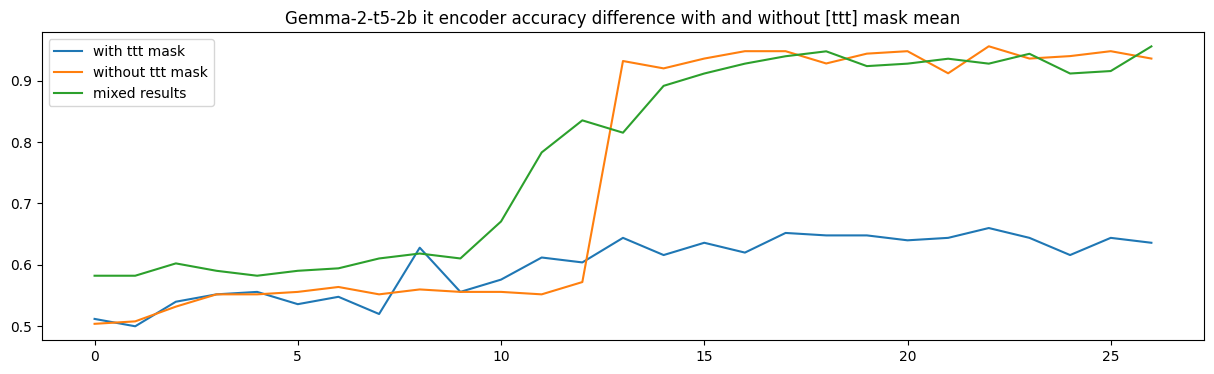

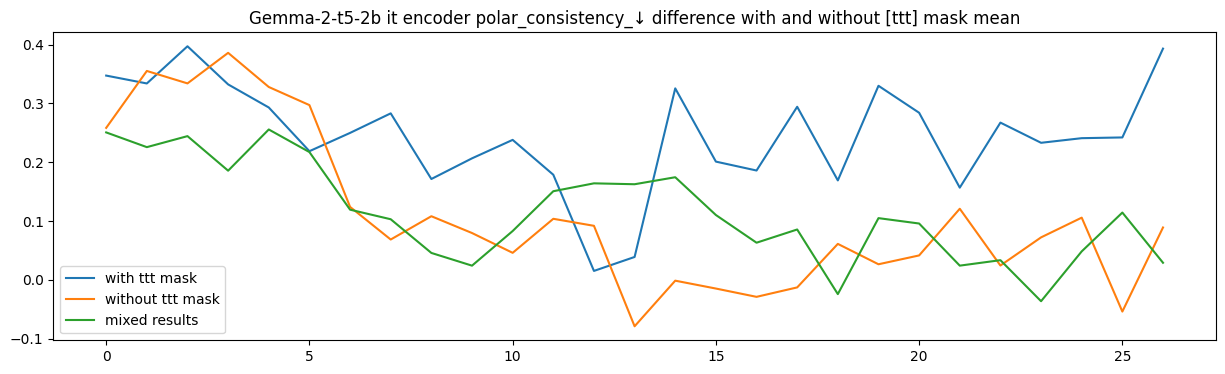

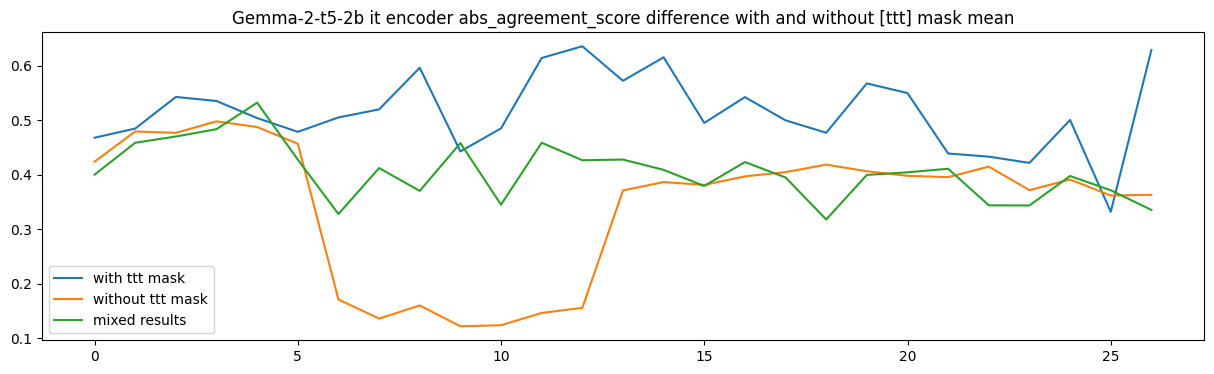

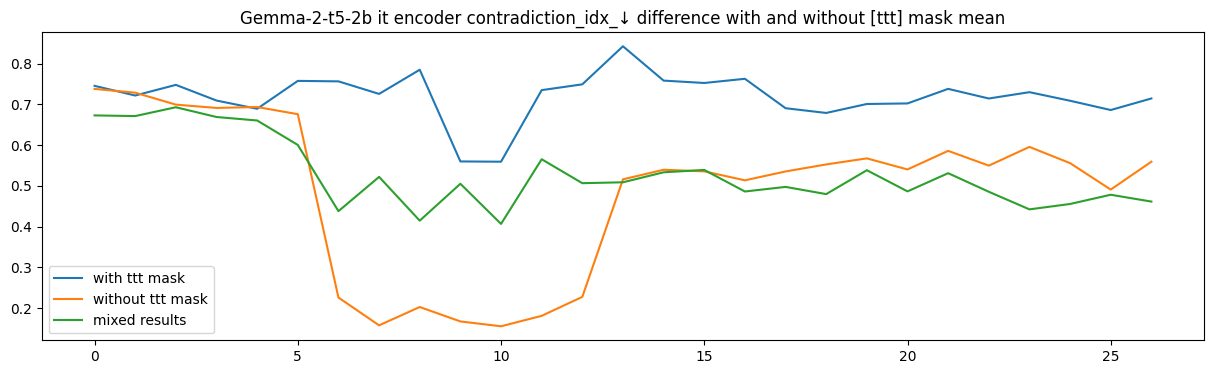

In [9]:
for idx, metric in enumerate(METRICS):
    
    fig = plt.figure(figsize=(15, 4))
    plt.plot(gemma2b_t5_ttt_it_table[metric], label='with ttt mask')
    plt.plot(gemma2b_t5_not_it_table[metric], label='without ttt mask')
    plt.plot(gemma2b_t5_orig_it_table[metric], label='mixed results')
    
   # if idx != 0:
      #  plt.hlines(0, 0, len(gemma2b_t5_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Gemma-2-t5-2b it encoder '+metric+' difference with and without [ttt] mask '+token_enc)
    plt.show()

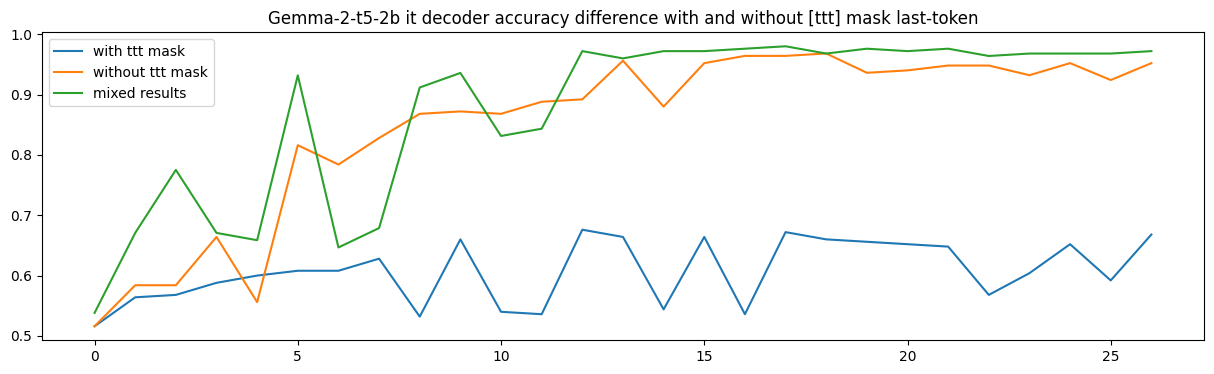

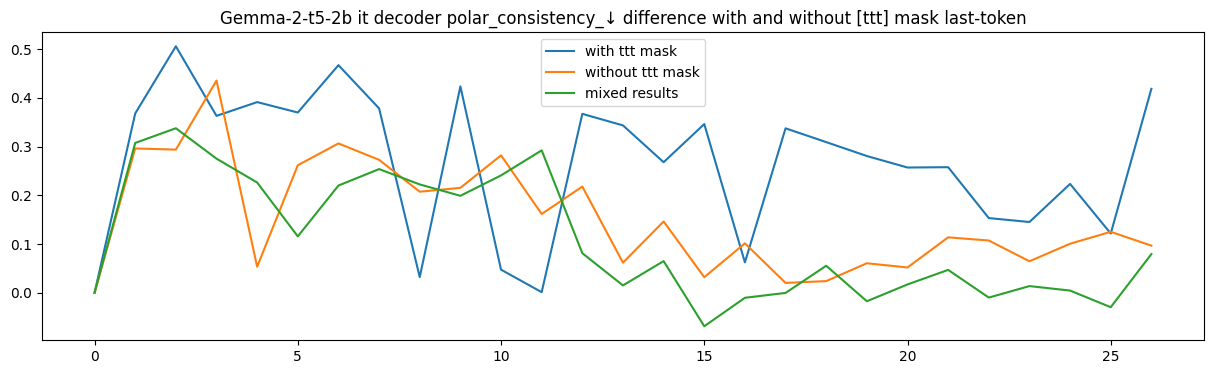

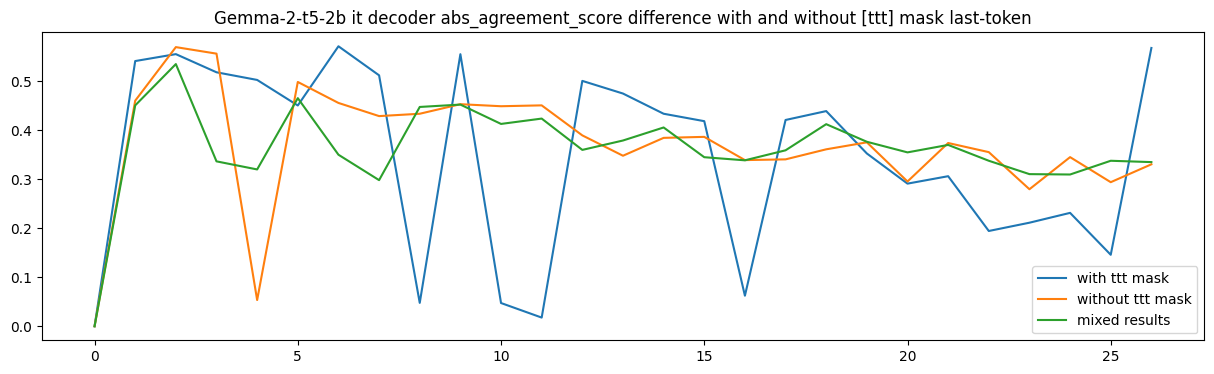

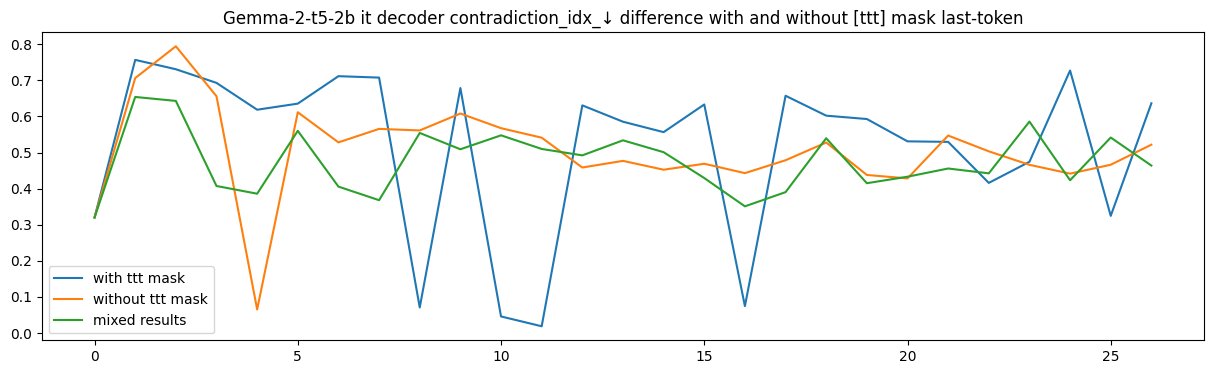

In [10]:
for idx, metric in enumerate(METRICS):
    
    fig = plt.figure(figsize=(15, 4))
    plt.plot(gemma2b_t5_ttt_dec_it_table[metric], label='with ttt mask')
    plt.plot(gemma2b_t5_not_dec_it_table[metric], label='without ttt mask')
    plt.plot(gemma2b_t5_orig_dec_it_table[metric], label='mixed results')
    
   # if idx != 0:
      #  plt.hlines(0, 0, len(gemma2b_t5_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Gemma-2-t5-2b it decoder '+metric+' difference with and without [ttt] mask '+token_dec)
    plt.show()

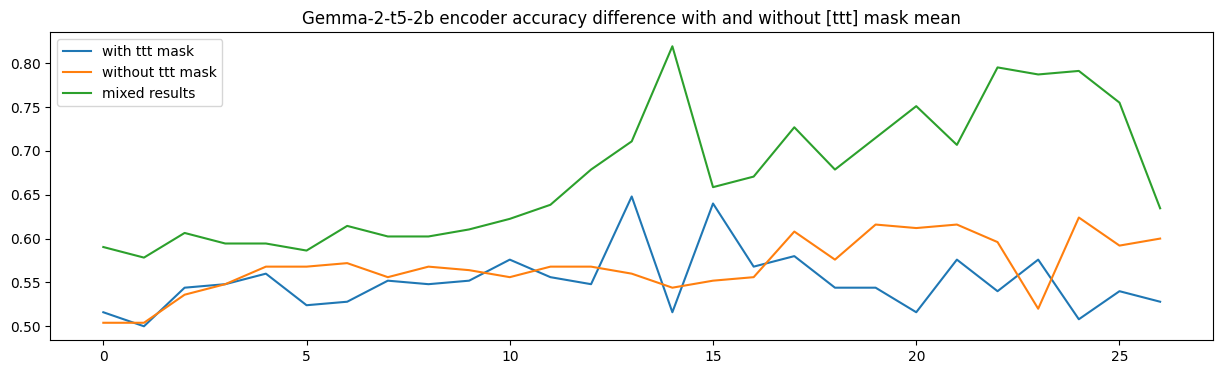

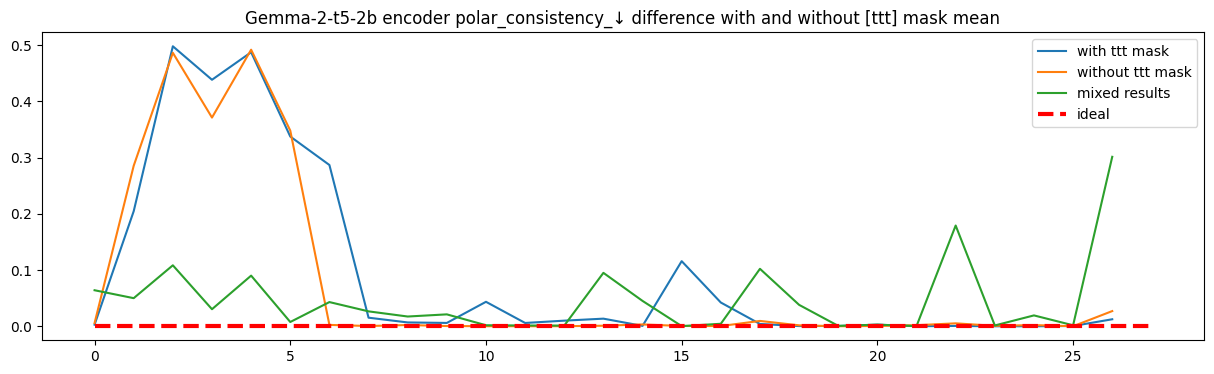

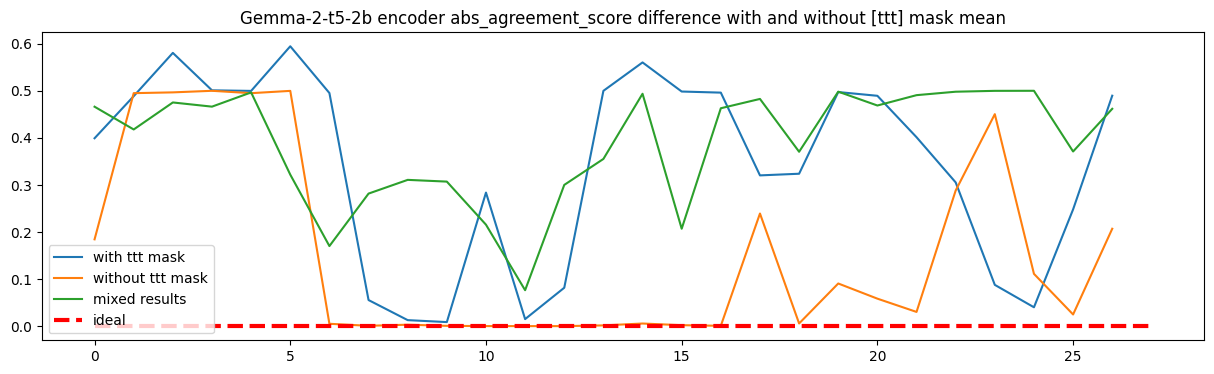

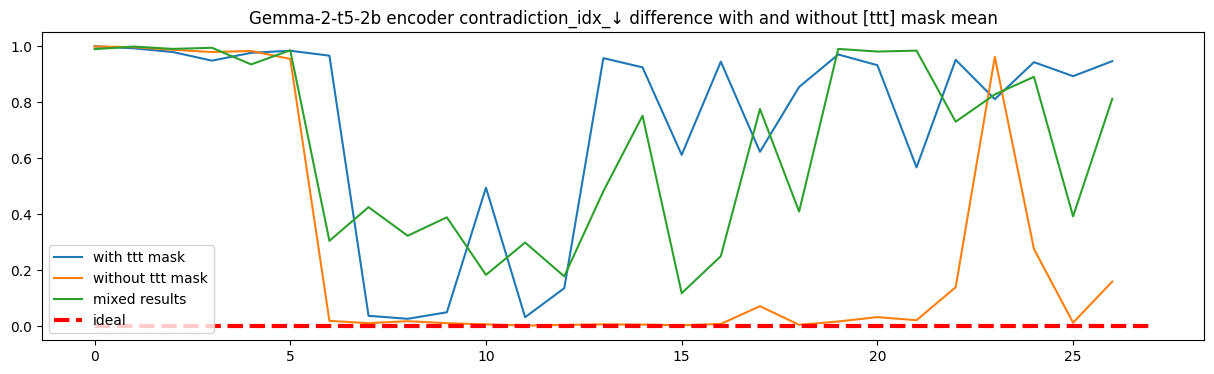

In [11]:
for idx, metric in enumerate(METRICS):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(gemma2b_t5_ttt_table[metric], label='with ttt mask')
    plt.plot(gemma2b_t5_not_table[metric], label='without ttt mask')
    plt.plot(gemma2b_t5_orig_table[metric], label='mixed results')
    
    if idx != 0:
        plt.hlines(0, 0, len(gemma2b_t5_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Gemma-2-t5-2b encoder '+metric+' difference with and without [ttt] mask '+token_enc)
    plt.show()

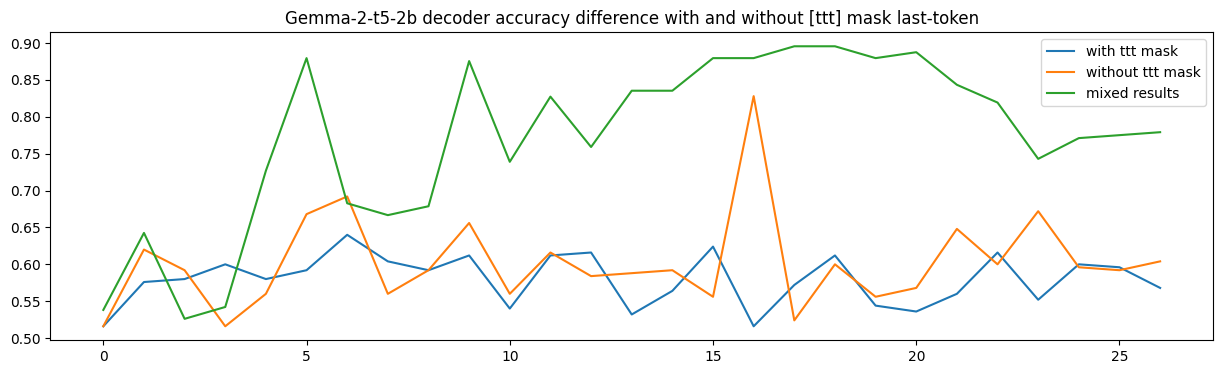

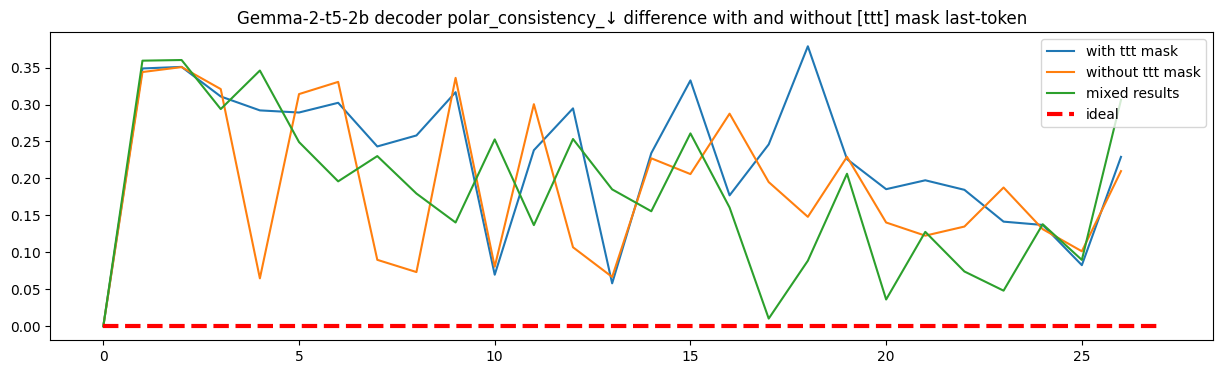

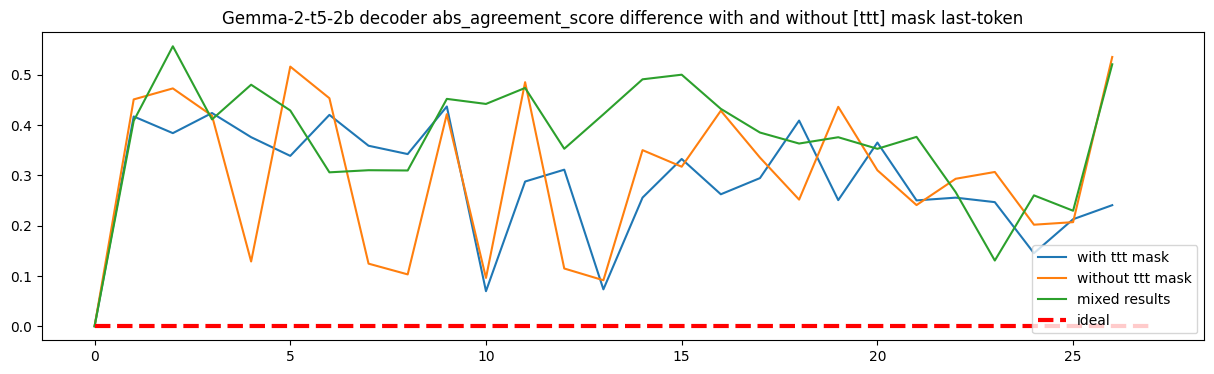

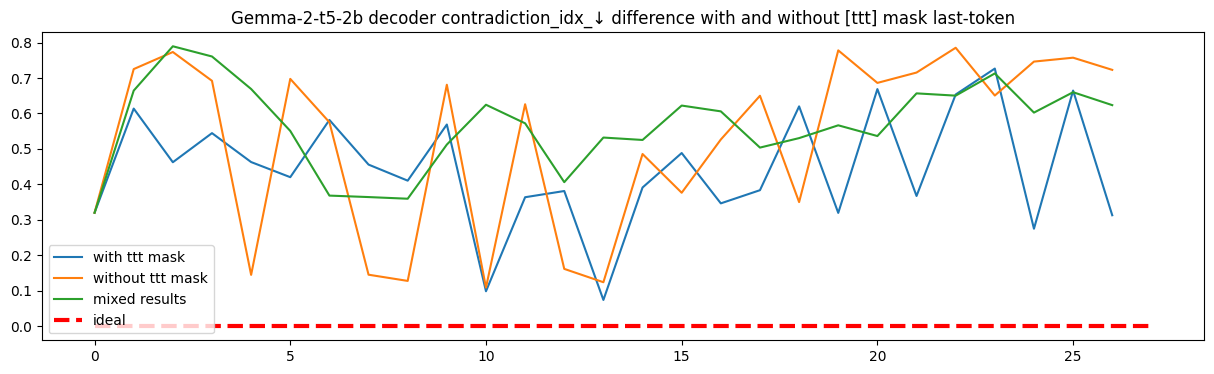

In [12]:
for idx, metric in enumerate(METRICS):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(gemma2b_t5_ttt_dec_table[metric], label='with ttt mask')
    plt.plot(gemma2b_t5_not_dec_table[metric], label='without ttt mask')
    plt.plot(gemma2b_t5_orig_dec_table[metric], label='mixed results')
    
    if idx != 0:
        plt.hlines(0, 0, len(gemma2b_t5_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('Gemma-2-t5-2b decoder '+metric+' difference with and without [ttt] mask '+token_dec)
    plt.show()

1. last-token, decoder — уходит в 1, decodr-it норм

In [13]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(gemma2b_t5_ttt_it_table[metric], label='with ttt mask')
#     plt.plot(gemma2b_t5_not_it_table[metric], label='without ttt mask')
#     plt.plot(gemma2b_t5_orig_it_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(gemma2b_t5_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Gemma-2-t5-2b '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [14]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(gemma2b_t5_ttt_dec_table[metric], label='with ttt mask')
#     plt.plot(gemma2b_t5_not_dec_table[metric], label='without ttt mask')
#     plt.plot(gemma2b_t5_orig_dec_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(gemma2b_t5_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Gemma-2-t5-2b '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [15]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(gemma9b_ttt_table[metric], label='with ttt mask')
#     plt.plot(gemma9b_not_table[metric], label='without ttt mask')
#     plt.plot(gemma9b_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(gemma9b_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Gemma-2-9b '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [16]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(gemma9b_it_ttt_table[metric], label='with ttt mask')
#     plt.plot(gemma9b_it_not_table[metric], label='without ttt mask')
#     plt.plot(gemma9b_it_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(gemma9b_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Gemma-2-9b-it '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [17]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(gemma2b_ttt_table[metric], label='with ttt mask')
#     plt.plot(gemma2b_not_table[metric], label='without ttt mask')
#     plt.plot(gemma2b_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(gemma2b_not_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Gemma-2-2b '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [18]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(gemma2b_it_ttt_table[metric], label='with ttt mask')
#     plt.plot(gemma2b_it_not_table[metric], label='without ttt mask')
#     plt.plot(gemma2b_it_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(gemma2b_it_orig_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Gemma-2-2b-it '+metric+' difference with and without [ttt] mask')
#     plt.show()

Metrics: acc (max), pc (min), ci (min)
gemma  | $25\%$ | $25\%-50\%$ | $50\%-75*\%$| $75\%-100\%$ |
---------------|-----------------|-----------|----------|--------------
gemma2-2b_ttt | 0.585, 0.00, 0.20 | 0.596, 0.03, 0.16 | 0.590, 0.66, 0.93 | 0.606, 0.23, 0.77 |
gemma2-2b_not | 0.585, 0.00, 0.32 | 0.580, 0.00, 0.01 | 0.521, 0.00, 0.01 | 0.654, 0.00, 0.06 |
gemma2-2b_mixed | 0.663, 0.00, 0.32 | 0.675, 0.02, 0.20 | 0.880, 0.04, 0.23 | 0.876, 0.11, 0.43 |
gemma2-2b-it_ttt | 0.580, 0.00, 0.32 | 0.622, 0.00, 0.05 | 0.596, 0.74, 0.96 | 0.622, 0.67, 0.75 |
gemma2-2b-it_not | 0.585, 0.00, 0.32 | 0.564, 0.00, 0.00 | 0.957, 0.00, 0.02 | 0.952, 0.01, 0.37 |
gemma2-2b-it_mixed | 0.627, 0.00, 0.32 | 0.679, 0.03, 0.18 | 0.968, 0.03, 0.24 | 0.968, 0.02, 0.38 |
gemma2-9b_ttt | 0.580, 0.00, 0.06 | 0.612, 0.12, 0.29 | 0.633, 0.67, 0.83 | 0.654, 0.29, 0.77 |
gemma2-9b_not | 0.617, 0.00, 0.01 | 0.521, 0.00, 0.01 | 0.771, 0.00, 0.02 | 0.761, 0.00, 0.06 |
gemma2-9b_mixed | 0.683, 0.00, 0.18 | 0.687, 0.02, 0.21 | 0.956, 0.04, 0.23 | 0.912, 0.02, 0.22 |
gemma2-9b-it_ttt | 0.580, 0.00, 0.05 | 0.612, 0.27, 0.62 | 0.670, 0.66, 0.86 | 0.665, 0.50, 0.79 |
gemma2-9b-it_not | 0.622, 0.00, 0.02 | 0.521, 0.00, 0.00 | 0.963, 0.01, 0.34 | 0.941, 0.02, 0.36 |
gemma2-9b-it_mixed | 0.679, 0.00, 0.14 | 0.687, 0.02, 0.14 | 0.980, 0.03, 0.31 | 0.968, 0.04, 0.35 |

1. IT fine tuning не всегда улучшает внутренние согласованности (gemma table, gemma-9b vs gemma 9b-it)

## **Llama**



In [19]:
with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-3-8B_mixed_data_results.pkl', 'rb') as f:
  llama8b_orig = pickle.load(f)

with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-3-8B_not_data_results.pkl', 'rb') as f:
    llama8b_not = pickle.load(f)

with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-3-8B_ttt_data_results.pkl', 'rb') as f:
   llama8b_ttt = pickle.load(f)

llama8b_ttt_table = get_results_table(llama8b_ttt)
llama8b_not_table = get_results_table(llama8b_not)
llama8b_orig_table = get_results_table(llama8b_orig)

with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-3-8B-Instruct_mixed_data_results.pkl', 'rb') as f:
   llama8b_it_orig = pickle.load(f)

with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-3-8B-Instruct_not_data_results.pkl', 'rb') as f:
    llama8b_it_not = pickle.load(f)

with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-3-8B-Instruct_ttt_data_results.pkl', 'rb') as f:
   llama8b_it_ttt = pickle.load(f)

llama8b_it_ttt_table = get_results_table(llama8b_it_ttt)
llama8b_it_not_table = get_results_table(llama8b_it_not)
llama8b_it_orig_table = get_results_table(llama8b_it_orig)



with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-Guard-2-8B_mixed_data_results.pkl', 'rb') as f:
   llama8b_guard_orig = pickle.load(f)

with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-Guard-2-8B_not_data_results.pkl', 'rb') as f:
    llama8b_guard_not = pickle.load(f)

with open(GENERAL_PATH+'kony/llama/ccs_Meta-Llama-Guard-2-8B_ttt_data_results.pkl', 'rb') as f:
   llama8b_guard_ttt = pickle.load(f)

llama8b_guard_ttt_table = get_results_table(llama8b_guard_ttt)
llama8b_guard_not_table = get_results_table(llama8b_guard_not)
llama8b_guard_orig_table = get_results_table(llama8b_guard_orig)


In [20]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(llama8b_ttt_table[metric], label='with ttt mask')
#     plt.plot(llama8b_not_table[metric], label='without ttt mask')
#     plt.plot(llama8b_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(llama8b_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Llama-3-8b '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [21]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(llama8b_it_ttt_table[metric], label='with ttt mask')
#     plt.plot(llama8b_it_not_table[metric], label='without ttt mask')
#     plt.plot(llama8b_it_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(llama8b_it_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Llama-3-8b-it '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [22]:
# for idx, metric in enumerate(METRICS):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(llama8b_guard_ttt_table[metric], label='with ttt mask')
#     plt.plot(llama8b_guard_not_table[metric], label='without ttt mask')
#     plt.plot(llama8b_guard_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, len(llama8b_ttt_table), label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Llama-3-8b-guard '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [23]:
llama_tables = {'llama8b' : [llama8b_ttt_table, llama8b_not_table, llama8b_orig_table],
                'llama8b-it' : [llama8b_it_ttt_table, llama8b_it_not_table, llama8b_it_orig_table],
                'llama8b-guard' : [llama8b_guard_ttt_table, llama8b_guard_not_table, llama8b_guard_orig_table]}

for table in [llama8b_ttt_table, llama8b_not_table, llama8b_orig_table,
              llama8b_it_ttt_table, llama8b_it_not_table, llama8b_it_orig_table,
              llama8b_guard_ttt_table, llama8b_guard_not_table, llama8b_guard_orig_table]:
      
      table['perc_cluster'] = table['layer_number'].apply(lambda x: get_relative_clusters(table, x))
      table['accuracy_cluster'] = table['accuracy'].apply(lambda x: get_accuracy_clusters(x))


for key in llama_tables.keys():
     for table in llama_tables[key]:
         result = format_pivot_table_string(table)
         print(f'{key} | {result} |')

llama8b | 0.580, 0.00, 0.02 | 0.590, 0.00, 0.01 | 0.649, 0.00, 0.03 | 0.665, 0.02, 0.14 |
llama8b | 0.617, 0.00, 0.02 | 0.532, 0.00, 0.01 | 0.777, 0.00, 0.01 | 0.761, 0.13, 0.43 |
llama8b | 0.683, 0.00, 0.24 | 0.948, 0.04, 0.17 | 0.952, 0.04, 0.30 | 0.916, 0.09, 0.42 |
llama8b-it | 0.580, 0.00, 0.02 | 0.638, 0.00, 0.02 | 0.665, 0.45, 0.85 | 0.638, 0.00, 0.08 |
llama8b-it | 0.585, 0.00, 0.02 | 0.527, 0.00, 0.00 | 0.915, 0.00, 0.02 | 0.910, 0.05, 0.38 |
llama8b-it | 0.679, 0.00, 0.24 | 0.952, 0.02, 0.18 | 0.968, 0.02, 0.34 | 0.972, 0.06, 0.33 |
llama8b-guard | 0.548, 0.00, 0.32 | 0.654, 0.00, 0.02 | 0.691, 0.29, 0.67 | 0.691, 0.23, 0.71 |
llama8b-guard | 0.548, 0.00, 0.32 | 0.527, 0.00, 0.01 | 0.904, 0.00, 0.02 | 0.894, 0.05, 0.40 |
llama8b-guard | 0.675, 0.00, 0.32 | 0.964, 0.02, 0.18 | 0.972, 0.04, 0.37 | 0.964, 0.03, 0.40 |


Metrics: acc (max), pc (min), ci (min)
llama  | $25\%$ | $25\%-50\%$ | $50\%-75*\%$| $75\%-100\%$ |
---------------|-----------------|-----------|----------|--------------
llama8b_ttt | 0.580, 0.00, 0.02 | 0.590, 0.00, 0.01 | 0.649, 0.00, 0.03 | 0.665, 0.02, 0.14 |
llama8b_not | 0.617, 0.00, 0.02 | 0.532, 0.00, 0.01 | 0.777, 0.00, 0.01 | 0.761, 0.13, 0.43 |
llama8b_mixed | 0.683, 0.00, 0.24 | 0.948, 0.04, 0.17 | 0.952, 0.04, 0.30 | 0.916, 0.09, 0.42 |
llama8b-it_ttt | 0.580, 0.00, 0.02 | 0.638, 0.00, 0.02 | 0.665, 0.45, 0.85 | 0.638, 0.00, 0.08 |
llama8b-it_not | 0.585, 0.00, 0.02 | 0.527, 0.00, 0.00 | 0.915, 0.00, 0.02 | 0.910, 0.05, 0.38 |
llama8b-it_mixed | 0.679, 0.00, 0.24 | 0.952, 0.02, 0.18 | 0.968, 0.02, 0.34 | 0.972, 0.06, 0.33 |
llama8b-guard_ttt | 0.548, 0.00, 0.32 | 0.654, 0.00, 0.02 | 0.691, 0.29, 0.67 | 0.691, 0.23, 0.71 |
llama8b-guard_not | 0.548, 0.00, 0.32 | 0.527, 0.00, 0.01 | 0.904, 0.00, 0.02 | 0.894, 0.05, 0.40 |
llama8b-guard_mixed | 0.675, 0.00, 0.32 | 0.964, 0.02, 0.18 | 0.972, 0.04, 0.37 | 0.964, 0.03, 0.40 |

In [24]:
llama8b_ttt_table['index'] = 'llama8b_ttt'
llama8b_it_ttt_table['index'] = 'llama8b-it_ttt'
llama8b_guard_ttt_table['index'] = 'llama8b_guard_ttt'

llama8b_not_table['index'] = 'llama8b_not'
llama8b_it_not_table['index'] = 'llama8b-it_not'
llama8b_guard_not_table['index'] = 'llama8b_guard_not'

llama8b_orig_table['index'] = 'llama8b_mixed'
llama8b_it_orig_table['index'] = 'llama8b-it_mixed'
llama8b_guard_orig_table['index'] = 'llama8b_guard_mixed'


all_llama_metrics = pd.concat([llama8b_ttt_table, llama8b_not_table, llama8b_orig_table,
              llama8b_it_ttt_table, llama8b_it_not_table, llama8b_it_orig_table,
              llama8b_guard_ttt_table, llama8b_guard_not_table, llama8b_guard_orig_table])


for i in range(1, 5):
    max_pc = all_llama_metrics.query(f'accuracy_cluster == {str(i)}')['polar_consistency_↓'].max()
    max_ci = all_llama_metrics.query(f'accuracy_cluster == {str(i)}')['contradiction_idx_↓'].max()
    print(f'Cluster: {i}\n max pc: {max_pc}, max_ci: {max_ci}')

Cluster: 1
 max pc: 0.8561500310897827, max_ci: 0.9808292388916016
Cluster: 2
 max pc: 0.801936149597168, max_ci: 0.9733861684799194
Cluster: 3
 max pc: 0.22531059384346008, max_ci: 0.6834335327148438
Cluster: 4
 max pc: 0.18584385514259338, max_ci: 0.5361607670783997


In [25]:
all_llama_metrics.to_csv('all_llama_metrics.csv', index=False)

In [26]:
all_llm_metrics = pd.concat([all_llama_metrics, all_gemma_metrics])

def extract_group(index):
    if 'ttt' in index:
        return 'ttt'
    elif 'not' in index:
        return 'not'
    elif 'orig' in index or 'mixed' in index:
        return 'orig'
    else:
        return 'other'

all_llm_metrics['dataset'] = all_llm_metrics['index'].apply(extract_group)
all_llm_metrics['finetune'] = all_llm_metrics['index'].apply(lambda x: 'yes' if 'it' in x or 'guard' in x else 'no')

all_llm_metrics = all_llm_metrics.reset_index(drop=True) 
all_llm_metrics.to_csv('all_large_models.csv')


## **All2ALL metrics**

#### **1. PC-CI trade-off plot**
- Models $\geq 8$ b parameters


In [27]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.pyplot as plt
from itertools import product
import numpy as np

all_metrics = pd.read_csv('/Users/sabrinasadieh/Code/ccs_aisf/notebooks/metrics_eda/datasets/all_large_models.csv', index_col=0)

/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_2756/1231108825.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # или 'plasma', 'coolwarm' по вкусу


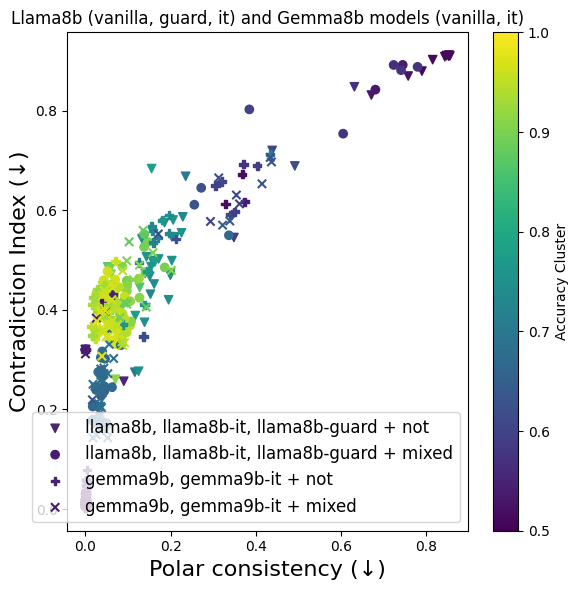

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))


# Normalize
norm = mcolors.Normalize(vmin=0.5, vmax=1)
cmap = cm.get_cmap('viridis')  # или 'plasma', 'coolwarm' по вкусу

# scatter 
def plot_scatter(table, marker, label, mode='acc', norm=norm, cmap=cmap):

    if mode == 'acc':
        scatter = ax.scatter(
        x=table['polar_consistency_↓'],
        y=table['contradiction_idx_↓'],
        c=table['accuracy'],
        cmap=cmap,
        norm=norm,
        marker=marker,
        label=label)

    return scatter

llamas_8b_not = all_metrics[all_metrics['index'].apply(lambda x: 'llama8b' in x and 'not' in x)]
plot_scatter(llamas_8b_not, 'v', 'llama8b, llama8b-it, llama8b-guard + not')


llamas_8b_orig = all_metrics[all_metrics['index'].apply(lambda x: 'llama8b' in x and 'mixed' in x)]
plot_scatter(llamas_8b_orig, 'o', 'llama8b, llama8b-it, llama8b-guard + mixed')


gemmas_9b_not = all_metrics[all_metrics['index'].apply(lambda x: 'gemma9b' in x and 'not' in x)]
plot_scatter(gemmas_9b_not, 'P', 'gemma9b, gemma9b-it + not')

gemmas_9b_orig = all_metrics[all_metrics['index'].apply(lambda x: 'gemma9b' in x and 'orig' in x)]
plot_scatter(gemmas_9b_orig, 'x', 'gemma9b, gemma9b-it + mixed')

# cbar
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy Cluster')

# Legend
ax.legend(loc='lower right', fontsize=12, ncol=1)

ax.set_xlabel('Polar consistency (↓)', fontsize=16)
ax.set_ylabel('Contradiction Index (↓)',  fontsize=16)

plt.title('Llama8b (vanilla, guard, it) and Gemma8b models (vanilla, it)')
plt.tight_layout()
plt.show()
# fig.savefig("llama_gemma_trade_off.pdf", format="pdf", bbox_inches="tight")

#### **2. Specific plot for Gemma-t5**

/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_2756/930555195.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # или 'plasma', 'coolwarm' по вкусу


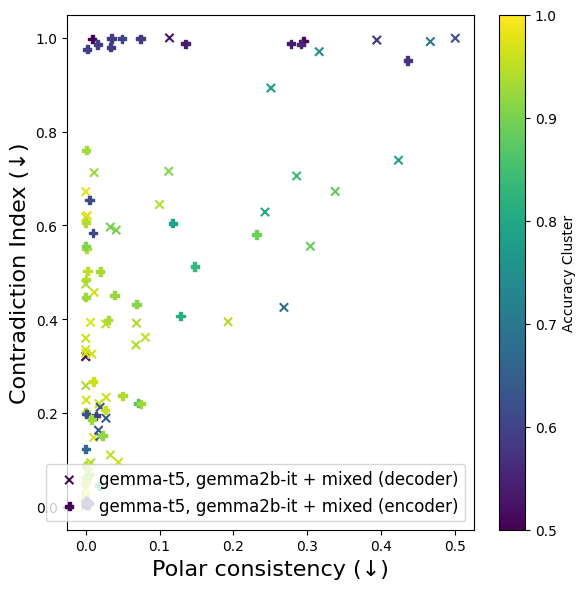

In [45]:
fig, ax = plt.subplots(figsize=(6, 6))


# Normalize
norm = mcolors.Normalize(vmin=0.5, vmax=1)
cmap = cm.get_cmap('viridis')  # или 'plasma', 'coolwarm' по вкусу

gemmas_2b_t5_orig_dec = all_metrics[all_metrics['index'].apply(lambda x: 't5' in x and 'ttt' not in x and 'dec' in x and 'it' in x)]
plot_scatter(gemmas_2b_t5_orig_dec, 'x', 'gemma-t5, gemma2b-it + mixed (decoder)')

gemmas_2b_t5_orig_dec = all_metrics[all_metrics['index'].apply(lambda x: 't5' in x and 'ttt' not in x and 'dec' not in x and 'it' in x)]
plot_scatter(gemmas_2b_t5_orig_dec, 'P', 'gemma-t5, gemma2b-it + mixed (encoder)')

# Legend

# cbar
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy Cluster')

# Legend
ax.legend(loc='lower right', fontsize=12, ncol=1)

ax.set_xlabel('Polar consistency (↓)', fontsize=16)
ax.set_ylabel('Contradiction Index (↓)',  fontsize=16)

plt.tight_layout()
plt.show()
ax.legend(loc='lower right', fontsize=12, ncol=1)


For gemma-t5 model we dont have specific trend that was funded to other models.

In [30]:
for i in range(1, 5):
    max_pc = all_metrics.query(f'accuracy_cluster == {str(i)}')['polar_consistency_↓'].max()
    max_ci = all_metrics.query(f'accuracy_cluster == {str(i)}')['contradiction_idx_↓'].max()

    median_ci = all_metrics.query(f'accuracy_cluster == {str(i)}')['contradiction_idx_↓'].median()
    median_pc = all_metrics.query(f'accuracy_cluster == {str(i)}')['polar_consistency_↓'].median()

    mean_ci = all_metrics.query(f'accuracy_cluster == {str(i)}')['contradiction_idx_↓'].mean()
    mean_pc = all_metrics.query(f'accuracy_cluster == {str(i)}')['polar_consistency_↓'].mean()

    print(f'Cluster: {i}\n max pc: {max_pc}, max_ci: {max_ci}')
    print(f'median pc: {median_pc}, median ci: {median_ci}')
    print(f'mean pc: {mean_pc}, mean ci: {mean_ci}')


Cluster: 1
 max pc: 0.9590966701507568, max_ci: 1.0
median pc: 0.06440794840455055, median ci: 0.5794280767440796
mean pc: 0.25591762060260015, mean ci: 0.5056738384278477
Cluster: 2
 max pc: 0.801936149597168, max_ci: 0.9999995231628418
median pc: 0.1854569017887115, median ci: 0.5898885130882263
mean pc: 0.23559906546904844, mean ci: 0.5388996622498974
Cluster: 3
 max pc: 0.4235836863517761, max_ci: 0.9999953508377076
median pc: 0.1355962306261062, median ci: 0.5445695519447327
mean pc: 0.13198000546721608, mean ci: 0.6112647660608802
Cluster: 4
 max pc: 0.3378545939922333, max_ci: 0.7602048516273499
median pc: 0.04637351073324675, median ci: 0.40446496009826655
mean pc: 0.05547382272600483, mean ci: 0.3917110690983355


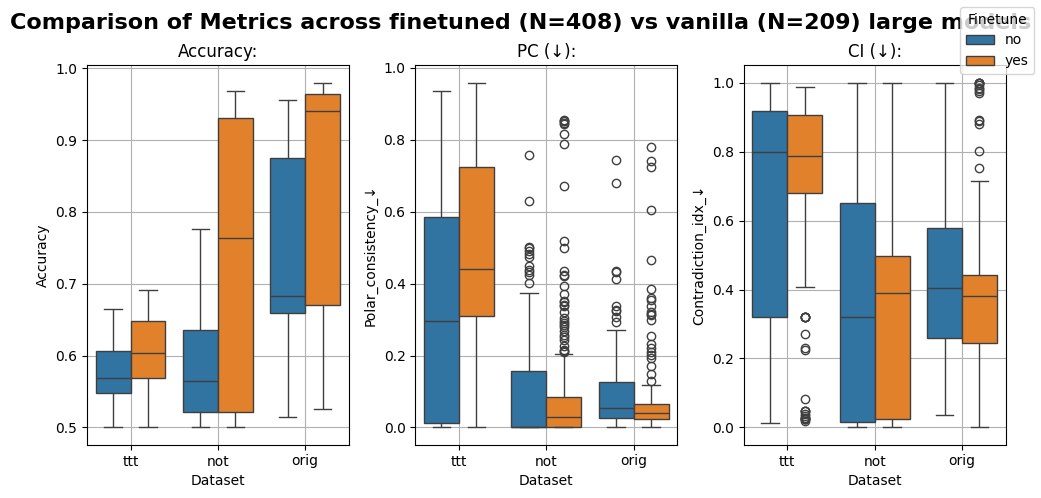

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pretrain RQ

# metrics
metrics = ['accuracy', 'polar_consistency_↓', 'contradiction_idx_↓']
titles = [
    'Accuracy:',
    'PC (↓):',
    'CI (↓):'
]

fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=False)

for ax, metric, title in zip(axes, metrics, titles):
    sns.boxplot(
        data=all_metrics,
        x='dataset',
        y=metric,
        hue='finetune',
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Dataset')
    ax.set_ylabel(metric.capitalize())
    ax.legend_.remove()
    ax.grid(True);

#
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Finetune', loc='upper right', ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Оставить место для общей легенды
plt.suptitle('Comparison of Metrics across finetuned (N=408) vs vanilla (N=209) large models', fontsize=16, weight='bold')
fig.savefig("fine_tine.pdf", format="pdf", bbox_inches="tight")

In [32]:
models_with_strong_perf_list = list(all_metrics.query('accuracy >= 0.625')['index'].value_counts().index)
slc_of_models_with_strong_perf = all_metrics[all_metrics['index'].apply(lambda x: x in models_with_strong_perf_list)]


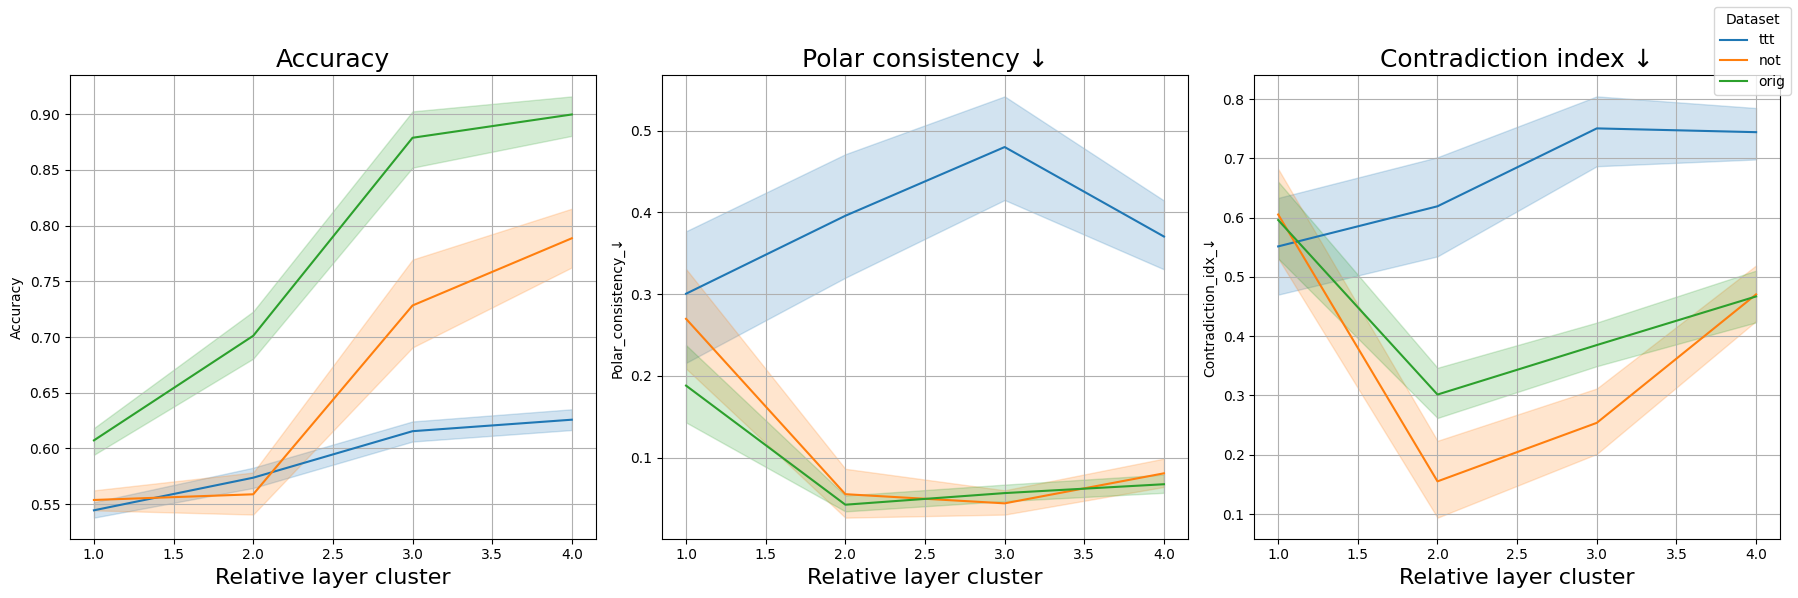

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
titles = [
    'Accuracy',
    'Polar consistency ↓',
    'Contradiction index ↓'
]


for ax, metric, title in zip(axes, metrics, titles):
    sns.lineplot(
        data=slc_of_models_with_strong_perf,
        x='perc_cluster',
        y=metric,
        hue='dataset',
        ax=ax,
        errorbar=(('ci', 95)), # +- one std
      #  err_style='band'

    )
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Relative layer cluster', fontsize=16)
    ax.set_ylabel(metric.capitalize())
    ax.legend_.remove()
    ax.grid(True);


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Dataset', loc='upper right', ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 
#plt.suptitle('Comparison of Metrics between all large models with accuracy >=0.625 on different datasets', fontsize=16, weight='bold')
plt.show()
# fig.savefig("rnd_check_large.pdf", format="pdf", bbox_inches="tight")

In [34]:
slc_of_models_with_strong_perf_not = slc_of_models_with_strong_perf.groupby(
                    ['perc_cluster', 'dataset']
                    )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
                        np.mean
                        ).query(
                            'dataset == "not"'
                        )

slc_of_models_with_strong_perf_ttt = slc_of_models_with_strong_perf.groupby(
                    ['perc_cluster', 'dataset']
                    )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
                        np.mean
                        ).query(
                            'dataset == "ttt"'
                        )

slc_of_models_with_strong_perf_mixed = slc_of_models_with_strong_perf.groupby(
                    ['perc_cluster', 'dataset']
                    )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
                        np.mean
                        ).query(
                            'dataset == "orig"'
                        )

/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_2756/1861523186.py:3: FutureWarning: The provided callable <function mean at 0x105a75e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_2756/1861523186.py:11: FutureWarning: The provided callable <function mean at 0x105a75e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_2756/1861523186.py:19: FutureWarning: The provided callable <function mean at 0x105a75e40> is currently using DataFrameGroupBy.mean. In a future version of 

In [35]:
np.mean(np.abs(slc_of_models_with_strong_perf_not.values - slc_of_models_with_strong_perf_ttt.values), axis=0)

array([0.074978  , 0.27432316, 0.3221211 ])

In [36]:
np.mean(np.abs(slc_of_models_with_strong_perf_mixed.values - slc_of_models_with_strong_perf_not.values), axis=0)

array([0.11437732, 0.03012969, 0.07261914])

1. Is PA-CCS works?

Чтобы ответить на этот вопрос, мы проводим контрольное тестирование из двух шагов: \
 (i) анализ PA-CCS метрик на harm-safe постановках сделанных разным сопособом — как парное отрицание и как переформулировки пар.  \
 (ii) анализ PA-CCS метрик на контрольном датасете, содержащим, вместо парного отрицания (которое дает смысловое разделение токенов), случайный токен not.

Как показано на фигуре rnd_check для шага (i) метрики имеют согласованные тренды по группам слоев, причем на больших моделях PA-CCS метрики более имеют меньший разброс среднего. Для больших моделей  средняя абсолютная разность средних значений  pc 0.03, ci 0.073. Это показывает, что PA-CCS метрики чувствительны к разным семантическим паттернам, которые формируют harm-safe разделение в модели, если оно существует. 

Для контрольного сценария  (ii) замена токена на случайный ведет к ухудшению метрик (снижение точности и рост для PC и CI). Средняя абсолютная разность средних значений для наборов данных not и ttt — pc 0.274, ci 0.322. 

Разница в средних показывает, что PA метрики позволяют отличить разделение на явных примерах от случайных артефактов (ПЛОХО ЗВУЧИТ). 

In [37]:
all_gemma_t5_metrics = all_gemma_metrics[all_gemma_metrics['index'].apply(lambda x: 't5' in x)]

all_gemma_t5_metrics['type'] = all_gemma_t5_metrics['index'].apply(lambda x: 'decoder' if 'dec' in x else 'encoder')
all_gemma_t5_metrics['dataset'] = all_gemma_t5_metrics['index'].apply(extract_group)

/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_2756/40389343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_gemma_t5_metrics['type'] = all_gemma_t5_metrics['index'].apply(lambda x: 'decoder' if 'dec' in x else 'encoder')
/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_2756/40389343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_gemma_t5_metrics['dataset'] = all_gemma_t5_metrics['index'].apply(extract_group)


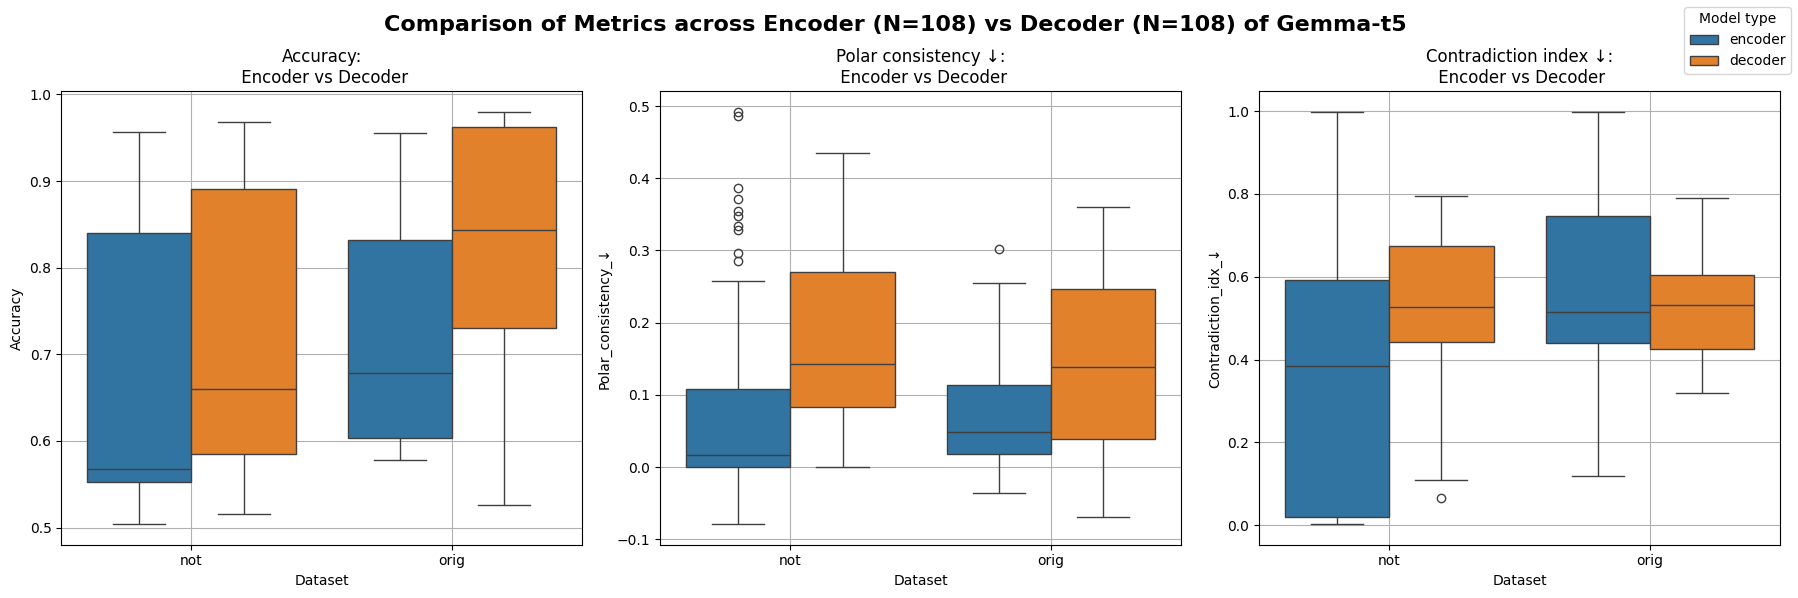

In [46]:
metrics = ['accuracy', 'polar_consistency_↓', 'contradiction_idx_↓']
titles = [
    'Accuracy:\n Encoder vs Decoder',
    'Polar consistency ↓:\n Encoder vs Decoder',
    'Contradiction index ↓:\n Encoder vs Decoder'
]


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for ax, metric, title in zip(axes, metrics, titles):
    sns.boxplot(
        data=all_gemma_t5_metrics[all_gemma_t5_metrics['dataset'] != 'ttt'],
        x='dataset',
        y=metric,
        hue='type',
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Dataset')
    ax.set_ylabel(metric.capitalize())
    ax.legend_.remove()
    ax.grid(True);

# Legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Model type', loc='upper right', ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 
plt.suptitle('Comparison of Metrics across Encoder (N=108) vs Decoder (N=108) of Gemma-t5', fontsize=16, weight='bold')
plt.show()

# fig.savefig('enc_dec_metrics.pdf')

1. Сжатия метрик нет, какой бы кластер по точности мы не использовали. Значит ли это, что эффект не машстабируем?